# Regression

In [1]:
import warnings
warnings.simplefilter(action='ignore')

## Datasets can be found [here](https://github.com/wadieskaf/ELTE_ITDS_Labs)

# 1. Imports

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [4]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2. Linear Data

## 2.1. Load Data

In [5]:
df_fuel = pd.read_csv('datasets/fuel_data.txt', delimiter='\t')
df_fuel['duration_minutes'] = df_fuel['duration'].apply(
    lambda time: int(time.split(':')[0]) * 60 + int(time.split(':')[1]))
df_fuel

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons,duration_minutes
0,2018.06.03,00:03,01:16,17,15,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1,73
1,2018.06.03,08:20,09:29,19,24,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2,69
2,2018.06.03,13:00,15:00,30,28,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3,100
3,2018.06.04,15:30,16:30,29,28,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1,48
4,2018.06.04,18:18,19:10,30,25,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018.09.03,22:00,22:55,21,19,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1,52
96,2018.09.04,06:42,07:55,16,17,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1,70
97,2018.09.04,20:00,21:10,17,16,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1,65
98,2018.09.05,08:15,09:25,15,20,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1,69


## 2.2. Experiment 1

### 2.2.1. Choose features and target variable(s) and split data

In [6]:
X = df_fuel[['duration_minutes']].values.reshape(-1, 1)
y = df_fuel['dist'].values.reshape(-1, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.2.2. Train model

In [8]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train);

### 2.2.3. Evaluate model

In [9]:
y_pred = model_1.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

MAE: 5.966284940349558
MSE: 48.844754631705726


### 2.2.4. Visualize the results

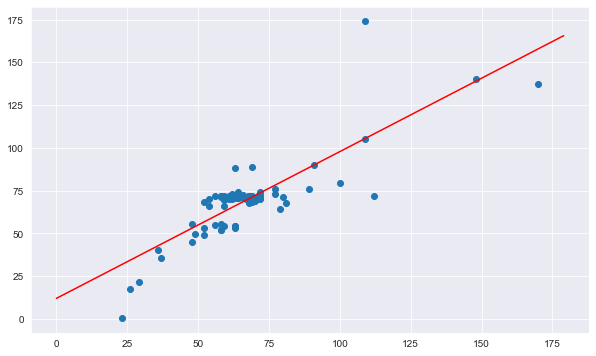

In [10]:
interval = np.arange(0, 180)
y_interval = model_1.predict(interval.reshape(-1, 1))

plt.figure(figsize=(10, 6))
X_original = [arr[0] for arr in X_train]
plt.scatter(x=X_original, y=y_train)
plt.plot(interval, y_interval, color='r')

## 2.3. Experiment 2

### 2.3.1. Choose features and target variable(s) and split data

In [11]:
X = df_fuel[['duration_minutes', 'speed']].values
y = df_fuel['dist'].values.reshape(-1, 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3.2. Train model

In [13]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train);

### 2.3.3. Evaluate model

In [14]:
y_pred = model_2.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

MAE: 2.15867139002585
MSE: 8.831669227815683


## 2.4. Experiment 3

### 2.4.1. Choose features and target variable(s) and split data

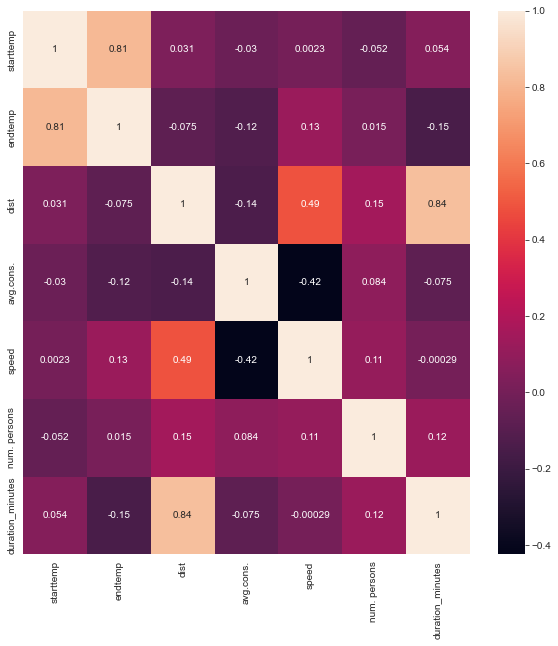

In [15]:
# correlation matrix visualization
plt.figure(figsize=(10, 10))
sns.heatmap(df_fuel.corr(), annot=True);

In [16]:
X = df_fuel[['duration_minutes', 'speed', 'num. persons']].values
y = df_fuel['dist'].values.reshape(-1, 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.4.2. Train model

In [18]:
model_3 = LinearRegression()
model_3.fit(X_train, y_train);

### 2.4.3. Evaluate model

In [19]:
y_pred = model_3.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

MAE: 2.168439262525447
MSE: 8.849911118150455


# 3. Non-Linear Data

In [20]:
# Create a dataframe to store the results
df_poly_experiments = pd.DataFrame(columns=['Experiment Number', 'Details', 'MAE', 'MSE'])

## 3.1. Load and Visualize Data

In [21]:
df_poly = pd.read_csv('datasets/multivar_poly_regression.csv')
df_poly

,x1,x2,y
0,-1.248691,-1.724936,-14.702219
1,3.223513,-1.154199,-13.456377
2,3.056344,-13.965425,-407.351396
3,4.145937,9.687644,-114.549694
4,0.269185,1.831660,-8.970815
...,...,...,...
245,0.650577,-4.143140,-35.443910
246,0.762922,2.644399,-12.178432
247,2.886344,-11.185433,-264.820815
248,-1.621070,-5.538563,-62.486664


<Figure size 1080x1080 with 0 Axes>

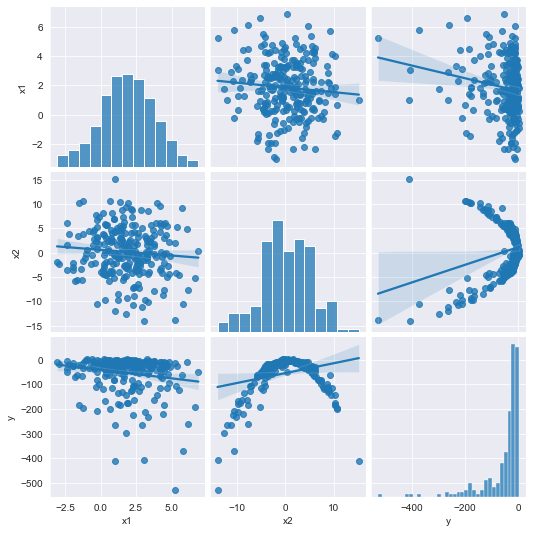

In [22]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_poly, kind='reg')

## 3.2. Experiment 1: Linear Regression with one feature

### 3.2.1. Choose features and target variable(s) and split data

In [23]:
X = df_poly['x2'].values.reshape(-1, 1)
y = df_poly['y'].values.reshape(-1, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2.2. Train model

In [25]:
model_4 = LinearRegression()
model_4.fit(X_train, y_train);

### 3.2.3. Evaluate model

In [26]:
y_pred = model_4.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
df_poly_experiments = df_poly_experiments.append({
    'Experiment Number': 1,
    'Details': 'Linear Regression with one feature',
    'MAE': mae,
    'MSE': mse
}, ignore_index=True)

MAE: 43.11542508806227
MSE: 3013.3909792684203


### 3.2.4. Visualize the results

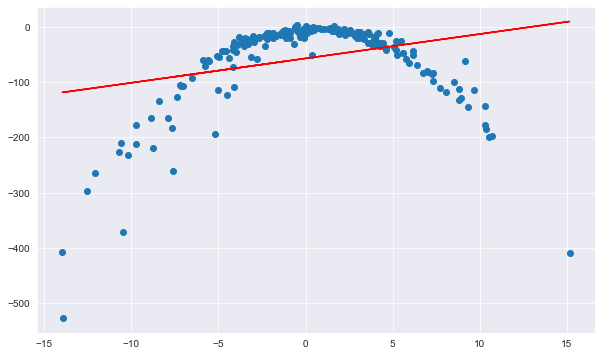

In [27]:
plt.figure(figsize=(10, 6))
y_pred_train = model_4.predict(X_train)
plt.scatter(x=X_train, y=y_train)
plt.plot(X_train, y_pred_train, color='r')

## 3.3. Experiment 2: Linear Regression with two features

### 3.3.1. Choose features and target variable(s) and split data

In [28]:
X = df_poly[['x1', 'x2']].values
y = df_poly['y'].values.reshape(-1, 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.3.2. Train model

In [30]:
model_5 = LinearRegression()
model_5.fit(X_train, y_train);

### 3.3.3. Evaluate model

In [31]:
y_pred = model_5.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
df_poly_experiments = df_poly_experiments.append({
    'Experiment Number': 2,
    'Details': 'Linear Regression with two features',
    'MAE': mae,
    'MSE': mse
}, ignore_index=True)

MAE: 43.67632244051792
MSE: 3108.226699491349


### 3.3.4. Visualize the results

Text(0.5, 0, 'y')

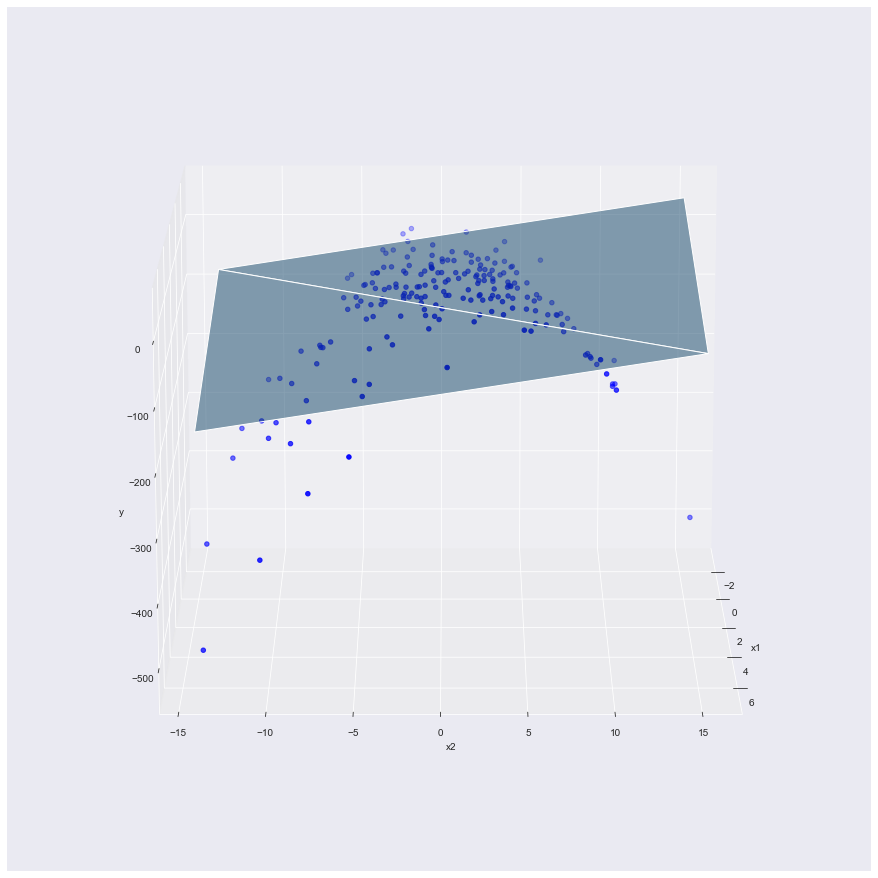

In [32]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, elev=15, azim=0, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', marker='o')

ax.plot_trisurf(np.array([df_poly['x1'].min(), df_poly['x1'].min(), df_poly['x1'].max(), df_poly['x1'].max()]),
                np.array([df_poly['x2'].min(), df_poly['x2'].max(), df_poly['x2'].min(), df_poly['x2'].max()]),
                model_5.predict(np.array([[df_poly['x1'].min(), df_poly['x2'].min()],
                                          [df_poly['x1'].min(), df_poly['x2'].max()],
                                          [df_poly['x1'].max(), df_poly['x2'].min()],
                                          [df_poly['x1'].max(), df_poly['x2'].max()]])).flatten(),
                alpha=.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [33]:
# Update function that updates the plot
def update(i):
    ax.azim = i
    return ax

In [34]:
anim = FuncAnimation(fig, update, frames=range(361), interval=33)
anim.save('plots/3D_linear_regression_plot.gif', dpi=80, writer='imagemagick');

MovieWriter imagemagick unavailable; using Pillow instead.


## 3.4. Experiment 3: Polynomial Regression with one feature

### 3.4.1. Choose features and target variable(s) and split data

In [35]:
X = df_poly['x2'].values.reshape(-1, 1)
y = df_poly['y'].values.reshape(-1, 1)

In [36]:
X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train_temp)
X_test = poly.fit_transform(X_test_temp)

### 3.4.2. Train model

In [38]:
model_6 = LinearRegression()
model_6.fit(X_train, y_train);

### 3.4.3. Evaluate model

In [39]:
y_pred = model_6.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
df_poly_experiments = df_poly_experiments.append({
    'Experiment Number': 3,
    'Details': 'Polynomial Regression with one feature',
    'MAE': mae,
    'MSE': mse
}, ignore_index=True)

MAE: 10.48328175307757
MSE: 214.84119799498035


### 3.4.4. Visualize the results

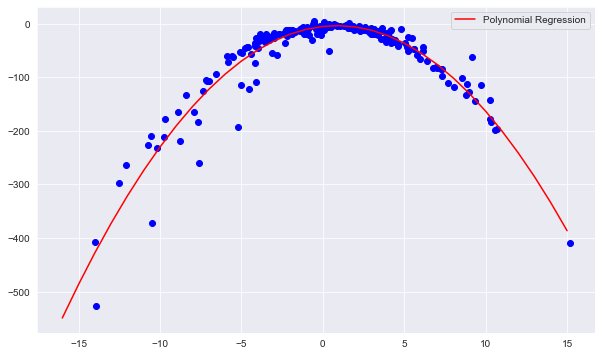

In [40]:
interval = np.arange(-16, 16).reshape(-1, 1)
poly_interval = poly.fit_transform(interval)
predictions = model_6.predict(poly_interval)

plt.figure(figsize=(10, 6))
plt.scatter(x=X_train_temp, y=y_train, c='b')
plt.plot(interval, predictions, color='r', label='Polynomial Regression')
plt.legend()
plt.show()

## 3.5. Experiment 4: Polynomial Regression with two features

### 3.5.1. Choose features and target variable(s) and split data

In [41]:
X = df_poly[['x1', 'x2']].values
y = df_poly['y'].values.reshape(-1, 1)

In [42]:
X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
poly = PolynomialFeatures(degree=6)
X_train = poly.fit_transform(X_train_temp)
X_test = poly.fit_transform(X_test_temp)

### 3.5.2. Train model

In [44]:
model_7 = LinearRegression()
model_7.fit(X_train, y_train);

### 3.5.3. Evaluate model

In [45]:
y_pred = model_7.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
df_poly_experiments = df_poly_experiments.append({
    'Experiment Number': 4,
    'Details': 'Polynomial Regression with two features',
    'MAE': mae,
    'MSE': mse
}, ignore_index=True)

MAE: 2.8034048737511297
MSE: 10.58129379270353


In [46]:
print(model_7.intercept_)
print(model_7.coef_)

[-1289709.05970743]
[[ 1.28970729e+06  3.17135518e-01 -1.99443582e-01 -5.18134424e-01
   2.00162653e-01 -1.77047629e+00  4.26995373e-02  4.40980111e-01
   5.41808509e-02  7.57908870e-03  2.51742549e-02 -1.46317444e-02
   6.47057536e-03 -6.36000748e-03 -7.98923591e-04 -1.97851969e-02
  -2.72716409e-03 -1.02894747e-02 -1.25915979e-04 -3.21123344e-04
  -4.29129942e-05  1.88401952e-03  5.85105935e-04  1.27477660e-03
   1.13359448e-04  9.89711295e-05  2.97633180e-05  3.35136185e-06]]


**As we can see, the coefficients are very large. This is because the polynomial features are very large. This can be handled by using regularization such as Lasso or Ridge.**

### 3.5.4. Regularization: Ridge and Lasso

In [47]:
model_8 = Ridge(alpha=0.0001)
model_8.fit(X_train, y_train);

In [48]:
model_9 = Lasso(alpha=0.0001, max_iter=10000)
model_9.fit(X_train, y_train);

In [49]:
print(model_8.intercept_)
print(model_8.coef_)

[-1.77335214]
[[ 0.00000000e+00  3.17133353e-01 -1.99467896e-01 -5.18154038e-01
   2.00188961e-01 -1.77047037e+00  4.27090098e-02  4.40984121e-01
   5.41822575e-02  7.56360821e-03  2.51806915e-02 -1.46269909e-02
   6.45931120e-03 -6.32012646e-03 -7.94770413e-04 -1.97713613e-02
  -2.72094153e-03 -1.02883755e-02 -1.42305388e-04 -3.22408776e-04
  -4.27747021e-05  1.88171693e-03  5.83295253e-04  1.27478838e-03
   1.15644706e-04  9.91085018e-05  2.96352815e-05  3.33477668e-06]]


In [50]:
print(model_9.intercept_)
print(model_9.coef_)

[-2.04333042]
[ 0.00000000e+00  4.10609869e-01 -1.98466428e-01 -3.20550636e-01
  2.57477276e-01 -1.75453560e+00 -2.41159053e-02  4.24515749e-01
  4.30283863e-02  6.49671746e-03  1.50791654e-02 -2.33630260e-02
  8.34863267e-04 -6.91019476e-03 -8.47464629e-04 -1.47130460e-02
  6.25639554e-04 -7.16593914e-03  3.77235996e-04 -1.94869384e-04
 -3.23234719e-05  1.47336551e-03  3.00242788e-04  9.54427154e-04
  5.19860337e-05  7.52116600e-05  2.58497760e-05  2.94149936e-06]


**As we can see, the coefficients are much smaller now.**

### 3.5.5. Evaluate the new models

In [51]:
y_pred = model_8.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
df_poly_experiments = df_poly_experiments.append({
    'Experiment Number': 5,
    'Details': 'Polynomial Regression with two features and Ridge regularization',
    'MAE': mae,
    'MSE': mse
}, ignore_index=True)

MAE: 2.8021131243166253
MSE: 10.56686297746284


In [52]:
y_pred = model_9.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
df_poly_experiments = df_poly_experiments.append({
    'Experiment Number': 6,
    'Details': 'Polynomial Regression with two features and Lasso regularization',
    'MAE': mae,
    'MSE': mse
}, ignore_index=True)

MAE: 2.7857370926781346
MSE: 10.434204646916323


# 3.6. Experiments Summary

In [53]:
# display the dataframe with text wrapping
pd.set_option('display.max_colwidth', None)
df_poly_experiments

,Experiment Number,Details,MAE,MSE
0,1,Linear Regression with one feature,43.115425,3013.390979
1,2,Linear Regression with two features,43.676322,3108.226699
2,3,Polynomial Regression with one feature,10.483282,214.841198
3,4,Polynomial Regression with two features,2.803405,10.581294
4,5,Polynomial Regression with two features and Ridge regularization,2.802113,10.566863
5,6,Polynomial Regression with two features and Lasso regularization,2.785737,10.434205


## 3.7 Visualize the best model

In [54]:
xs, ys = list(), list()
for x1 in np.linspace(df_poly['x1'].min(), df_poly['x1'].max(), 25):
    for x2 in np.linspace(df_poly['x2'].min(), df_poly['x2'].max(), 25):
        xs.append(x1)
        ys.append(x2)
zs = model_9.predict(poly.fit_transform(np.c_[xs, ys]))

Text(0.5, 0, 'y')

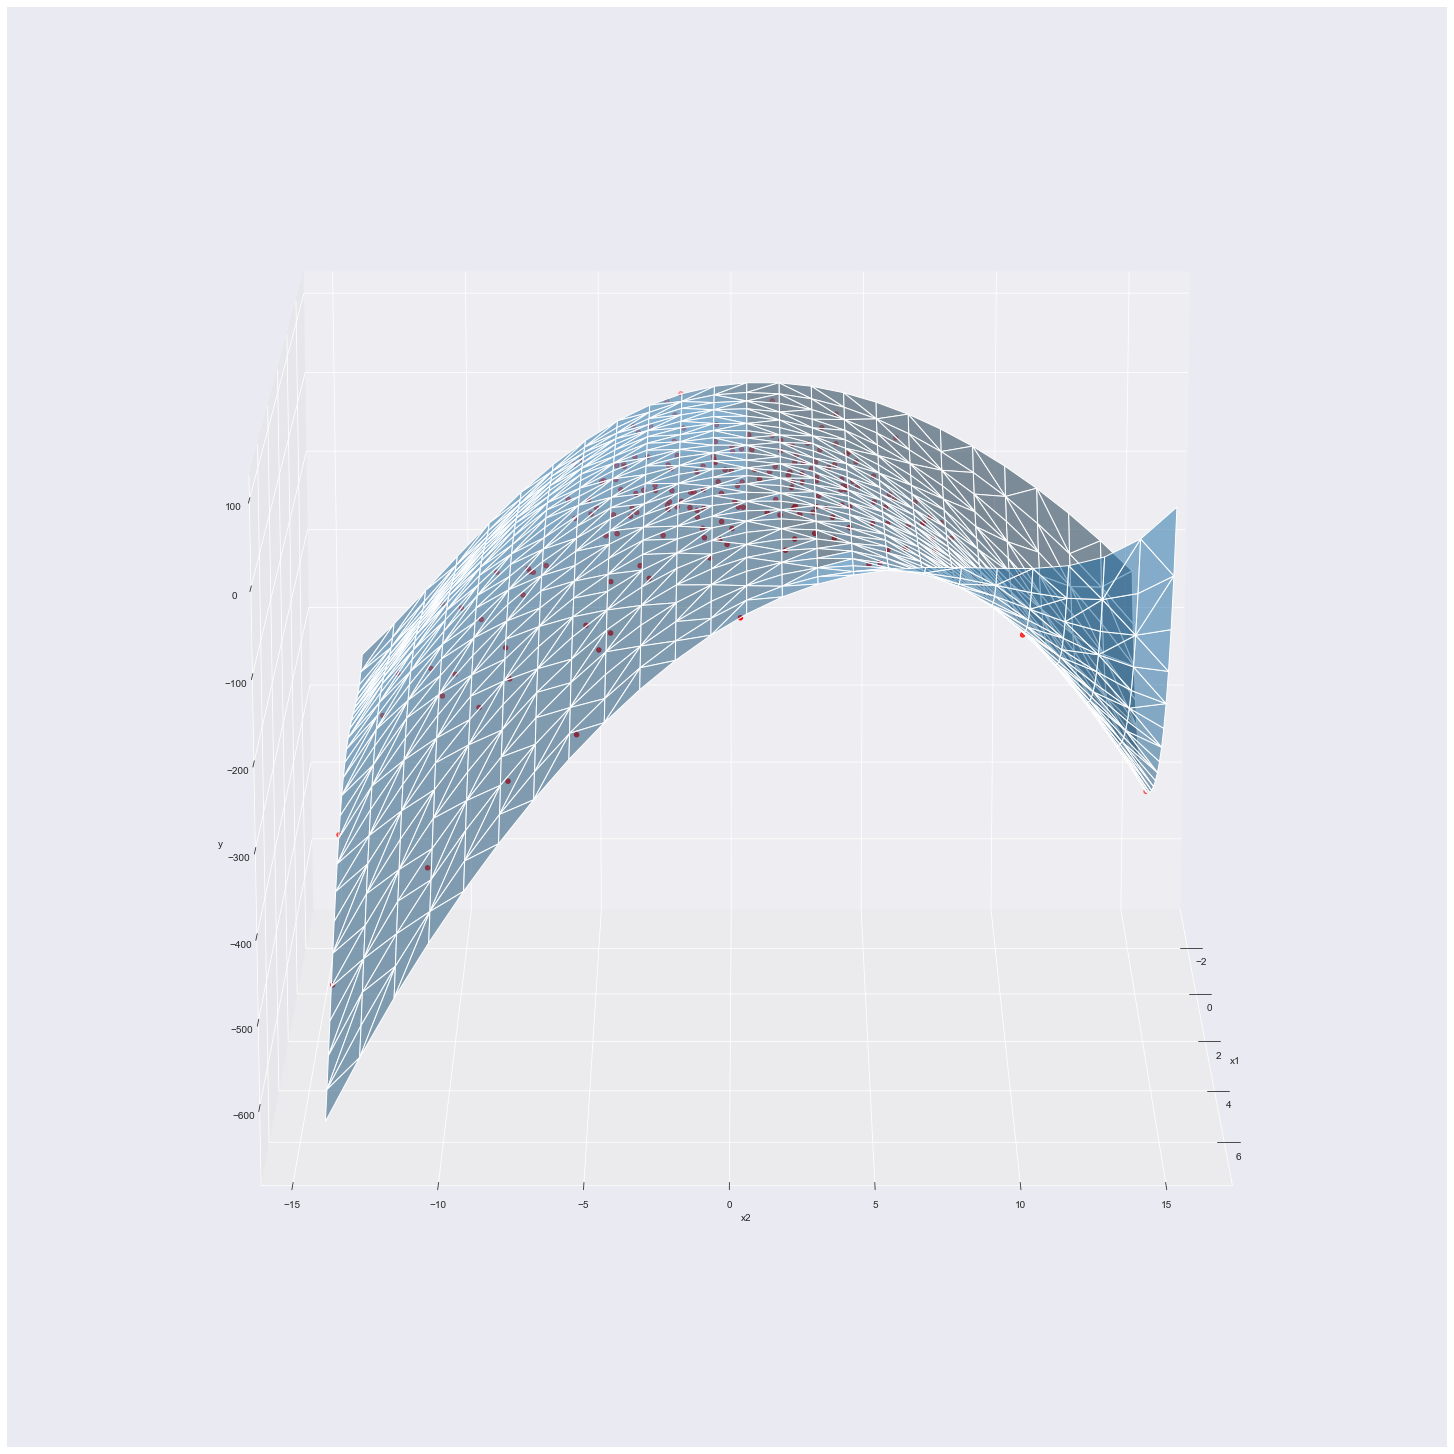

In [55]:
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig, elev=15, azim=0)
ax.scatter(X_train_temp[:, 0], X_train_temp[:, 1], y_train, c='r', marker='o')
ax.plot_trisurf(xs, ys, zs, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [ ]:
anim = FuncAnimation(fig, update, frames=range(361), interval=33)
anim.save('plots/3D_poly_regression_best_model.gif', dpi=80, writer='imagemagick');

MovieWriter imagemagick unavailable; using Pillow instead.


# 4. Exercise

## 1. Download the dataset of the US Housing Prices from [here](https://github.com/wadieskaf/ELTE_ITDS_Labs/tree/master/Datasets).
## 2. Load and explore the dataset.
## 3. Process the dataset if needed.
## 4. Conduct comprehensive experiments with the dataset in order to find the best model to predict the prices. You need to do the following:
### 4.1. Choose features and target variable (price) and split data.
### 4.2. Train model(s).
### 4.3. Evaluate model(s).
### 4.4. Based on the results, you may need to do some feature engineering and/or regularization and try again.
### 4.5. Visualize the best model.
## 5. Write a summary of your experiments.